In [1]:
import sys
import os
import numpy as np
import xarray as xr
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib

import cartopy.crs as ccrs
import matplotlib.ticker as ticker

from maps import *

In [2]:
ds = xr.open_dataset("GIGATL3_Equator.nc")

#Selection de la profondeur
z = -1000

#Configuration Plot
boundaries = np.linspace(-16, 16, 17) # Levels barre de couleur
cmap = colors.ListedColormap(['limegreen','green','navy','mediumblue','blue',
                              'royalblue','cornflowerblue','skyblue','plum',
                              'violet','orchid','orangered','firebrick',
                              'maroon','darkorange','yellow']) # Couleur de la barre
levels_cont=np.linspace(-16, 16, 9) #Valeurs pour les contours
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


In [3]:
ds2 = ds.sel(z_rho = z,method = 'nearest')
ds2 = ds2.mean(dim="time")*100
# ds2 = ds2.where(ds2.uCart != 0, drop=True)

<Figure size 1440x1440 with 0 Axes>

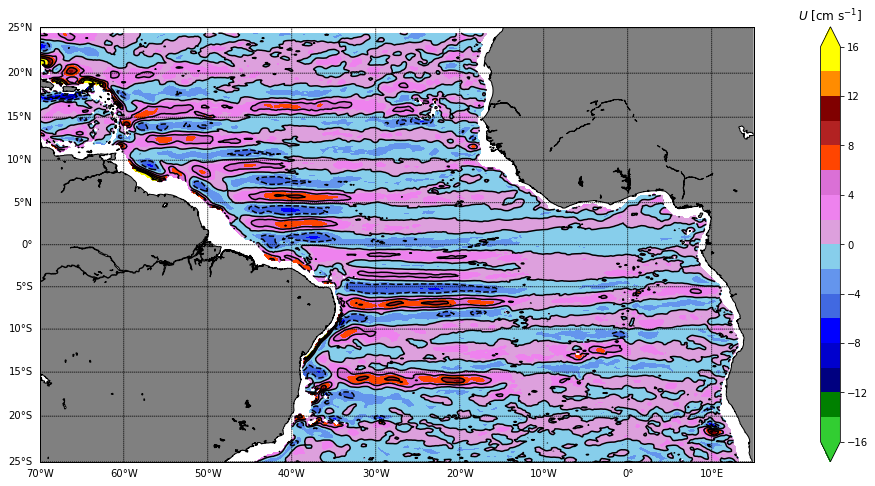

In [4]:
plt.figure(figsize=(20,20))
map_contourf_atlantic_tropical(ds2.y_rho,ds2.x_rho,ds2.uCart,vmin=-16,vmax=16.1,vstep=2,
                               cbar_title=r'$U$ [cm s$^{-1}$]',
                               cmap = cmap
                              )
plt.show()
